In [1]:
import pandas as pd

# Load the phishing dataset
# Read the first 10,000 rows from the CSV file
df_phishing = pd.read_csv('verified_online.csv', nrows=10000)
df_phishing.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8581764,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-05-20T21:21:32+00:00,yes,2024-05-20T23:04:05+00:00,yes,Other
1,8581655,https://verification-cloud.netlify.app/,http://www.phishtank.com/phish_detail.php?phis...,2024-05-20T19:30:49+00:00,yes,2024-05-21T00:10:56+00:00,yes,Apple
2,8581182,https://cookingpastaready.com/app/app/user.php,http://www.phishtank.com/phish_detail.php?phis...,2024-05-20T14:15:16+00:00,yes,2024-05-20T14:24:18+00:00,yes,Other
3,8581152,https://fuorifrigo.com/vershteln/app/user.php,http://www.phishtank.com/phish_detail.php?phis...,2024-05-20T13:56:54+00:00,yes,2024-05-20T14:13:04+00:00,yes,Other
4,8580917,https://https-open-spotify-com-intl-one-servic...,http://www.phishtank.com/phish_detail.php?phis...,2024-05-20T07:39:25+00:00,yes,2024-05-20T19:24:15+00:00,yes,Other


In [2]:
# Load the benign dataset
df_benign = pd.read_csv('Philippine_Benign_Bank_Links.csv')
df_benign.head()

,url,type
0,https://www.eastwestbanker.com/,benign
1,https://www.eastwestbanker.com/business,benign
2,https://priority.eastwestbanker.com/,benign
3,https://www.eastwestbanker.com/about,benign
4,https://m.me/EastWestBanker,benign


In [3]:
# Drop all columns except "url" in both datasets
df_phishing = df_phishing[['url']]
df_benign = df_benign[['url']]

# Add a new column called "type" filled with the value "phishing" for the phishing dataset
df_phishing['type'] = 'phishing'

# Add a new column called "type" filled with the value "benign" for the benign dataset
df_benign['type'] = 'benign'

# Concatenate the two datasets
df = pd.concat([df_phishing, df_benign])

# Save the concatenated DataFrame to a CSV file
df.to_csv('combined_dataset.csv', index=False)

# Print the count of phishing and benign URLs
print("Count of Phishing URLs:", len(df[df['type'] == 'phishing']))
print("Count of Benign URLs:", len(df[df['type'] == 'benign']))

df.head()

Count of Phishing URLs: 10000
Count of Benign URLs: 6574


,url,type
0,https://docs.google.com/presentation/d/e/2PACX...,phishing
1,https://verification-cloud.netlify.app/,phishing
2,https://cookingpastaready.com/app/app/user.php,phishing
3,https://fuorifrigo.com/vershteln/app/user.php,phishing
4,https://https-open-spotify-com-intl-one-servic...,phishing


In [4]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [5]:
def count_atrate(url):

    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

In [6]:
def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))

In [7]:
from urllib.parse import urlparse

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domain'] = df['url'].apply(lambda i: no_of_embed(i))

In [8]:
def count_https(url):
    return url.count('https:')

df['count-https:'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http:')

df['count-http:'] = df['url'].apply(lambda i : count_http(i))

In [9]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0


df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Edzel Armengol\AppData\Local\Temp\ipykernel_34700\423109293.py:2: SyntaxWarning: invalid escape sequence '\.'
  match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tiny

In [10]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

df['count-digits']= df['url'].apply(lambda i: digit_count(i))

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))


In [11]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [12]:
from googlesearch import search

def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [13]:
#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

import nltk
from nltk.tokenize import RegexpTokenizer


In [14]:
pip install tld

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\edzel armengol\appdata\local\programs\python\python312\lib\site-packages\dlib-19.24.4-py3.12-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [15]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))


In [16]:
df.head()

,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https:,count-http:,short_url,count.,...,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld,tld_length
0,https://docs.google.com/presentation/d/e/2PACX...,phishing,0,0,175,0,1,0,0,2,...,5,3,12,140,1,1,15,12,com,3
1,https://verification-cloud.netlify.app/,phishing,0,0,39,0,1,0,0,2,...,1,0,0,32,1,1,30,0,netlify.app,11
2,https://cookingpastaready.com/app/app/user.php,phishing,0,0,46,0,1,0,0,2,...,0,0,0,38,1,1,21,3,com,3
3,https://fuorifrigo.com/vershteln/app/user.php,phishing,0,0,45,0,1,0,0,2,...,0,0,0,37,1,1,14,9,com,3
4,https://https-open-spotify-com-intl-one-servic...,phishing,0,0,66,0,1,0,0,2,...,6,0,0,53,1,1,54,2,com,3


In [17]:
df = df.drop("tld", axis=1)

In [18]:
df.columns

Index(['url', 'type', 'use_of_ip', 'count@', 'url_length',
       'count_embed_domain', 'count-https:', 'count-http:', 'short_url',
       'count.', 'count-www', 'count%', 'count?', 'count-', 'count=',
       'count-digits', 'count-letters', 'abnormal_url', 'google_index',
       'hostname_length', 'fd_length', 'tld_length'],
      dtype='object')

In [19]:
df['type'].value_counts()

phishing    10000
benign       6574
Name: type, dtype: int64

In [20]:
df.shape

(16574, 22)

In [21]:
df.head()

,url,type,use_of_ip,count@,url_length,count_embed_domain,count-https:,count-http:,short_url,count.,...,count?,count-,count=,count-digits,count-letters,abnormal_url,google_index,hostname_length,fd_length,tld_length
0,https://docs.google.com/presentation/d/e/2PACX...,phishing,0,0,175,0,1,0,0,2,...,1,5,3,12,140,1,1,15,12,3
1,https://verification-cloud.netlify.app/,phishing,0,0,39,0,1,0,0,2,...,0,1,0,0,32,1,1,30,0,11
2,https://cookingpastaready.com/app/app/user.php,phishing,0,0,46,0,1,0,0,2,...,0,0,0,0,38,1,1,21,3,3
3,https://fuorifrigo.com/vershteln/app/user.php,phishing,0,0,45,0,1,0,0,2,...,0,0,0,0,37,1,1,14,9,3
4,https://https-open-spotify-com-intl-one-servic...,phishing,0,0,66,0,1,0,0,2,...,0,6,0,0,53,1,1,54,2,3


# CNN


c:\Users\Edzel Armengol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.6842 - loss: 0.5754 - val_accuracy: 0.9796 - val_loss: 0.0887
Epoch 2/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9867 - loss: 0.0750 - val_accuracy: 0.9894 - val_loss: 0.0407
Epoch 3/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9968 - loss: 0.0269 - val_accuracy: 0.9913 - val_loss: 0.0343
Epoch 4/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9995 - loss: 0.0122 - val_accuracy: 0.9910 - val_loss: 0.0330
Epoch 5/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9996 - loss: 0.0081 - val_accuracy: 0.9853 - val_loss: 0.0525
Epoch 6/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.9906 - val_loss: 0.0349
Epoch 7/7
332/332 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9894 - val_loss: 0.0384
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9894 - loss: 0.0349
Test Accuracy: 0.

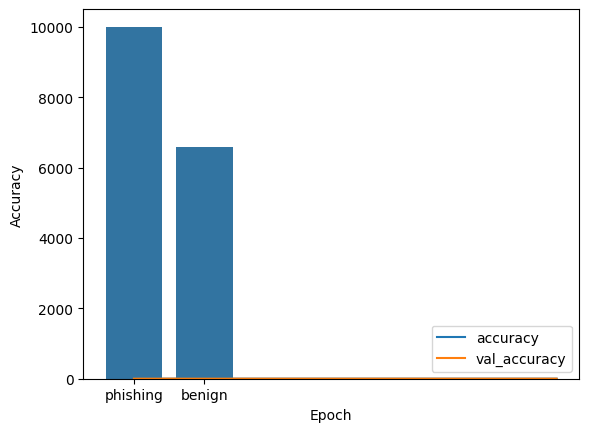

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1313
           1       1.00      0.99      0.99      2002

    accuracy                           0.99      3315
   macro avg       0.99      0.99      0.99      3315
weighted avg       0.99      0.99      0.99      3315



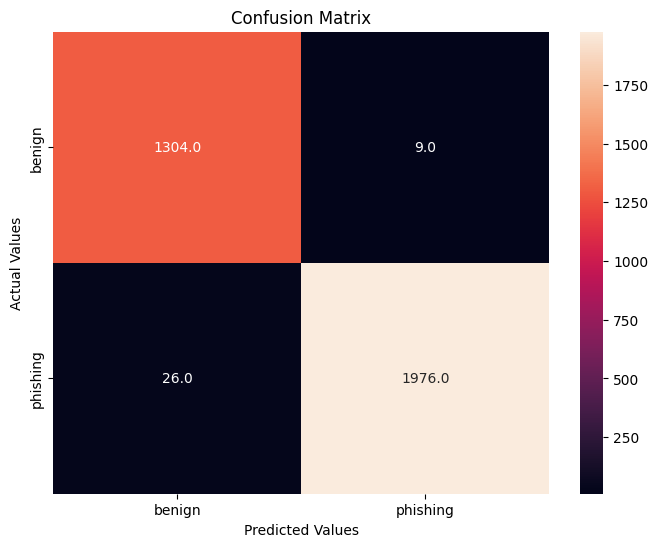

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Load dataset
df_combined = pd.read_csv('combined_dataset.csv')

# Visualize class distribution
sns.countplot(data=df_combined, x='type')

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_combined['url'])
vocab_size = len(tokenizer.word_index) + 1

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

max_length = 100
embedding_dim = 100

# Tokenization: URLs are tokenized to transform them into a format that can be processed by a neural network.
sequences = tokenizer.texts_to_sequences(df_combined['url'])
# Padding: This process ensures that all sequences (tokenized URLs) have the same length. Since neural networks process inputs in batches of fixed size, sequences must be uniform in length.
X_text = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encode target labels
lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
y = df['type_code']

# Include extracted features
X_features = df.drop(['url', 'type', 'type_code'], axis=1)

# Combine text and features
X_combined = np.hstack((X_text, X_features))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# CNN model
model = Sequential() #Type of data model processes
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))  #O(1)
model.add(Conv1D(64, 5, activation='sigmoid')) #Dense O(Input * Kernel * max_length * Neurons)
model.add(GlobalMaxPooling1D()) #O(W)
model.add(Dense(32, activation='sigmoid')) #Dense O(Input * Neuron)
model.add(Dropout(0.5)) #O(1)
model.add(Dense(1, activation='sigmoid')) #Dense layer O(Input * Neuron)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Save the trained model
model.save('trained_modelCNN.h5')

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['benign', 'phishing'], columns=['benign', 'phishing'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate summary statistics
feature_columns = ['use_of_ip', 'count@', 'url_length', 'count_embed_domain', 'count-https:',
                   'count-http:', 'short_url', 'count.', 'count-www', 'count%', 'count?',
                   'count-', 'count=', 'count-digits', 'count-letters', 'abnormal_url',
                   'google_index', 'hostname_length', 'fd_length', 'tld_length']

summary_stats = df.groupby('type')[feature_columns].mean().T
print(summary_stats)


type                   benign  phishing
use_of_ip            0.000000    0.0016
count@               0.001825    0.0180
url_length          59.172041   57.6232
count_embed_domain   0.008366    0.0010
count-https:         0.968360    0.8807
count-http:          0.032400    0.1305
short_url            0.002890    0.0720
count.               2.616215    2.1222
count-www            0.784606    0.0587
count%               0.127320    0.0473
count?               0.107393    0.1493
count-               1.657438    0.8960
count=               0.134165    0.3230
count-digits         1.690447    6.2044
count-letters       46.963949   42.7717
abnormal_url         0.999544    0.9998
google_index         1.000000    1.0000
hostname_length     16.648768   24.3379
fd_length            8.525859    5.3494
tld_length           4.313204    5.7942


In [24]:
import numpy as np
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
from urllib.parse import urlparse
from googlesearch import search
from tld import get_tld


# Load the tokenizer
with open('tokenizer.pkl', 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

# Global variables for explanations
phishing_explanations = []
benign_explanations = []

def explain_url(url):
    global phishing_explanations, benign_explanations

    # Clear previous explanations
    phishing_explanations.clear()
    benign_explanations.clear()

    features = {}

    # Use of IP address
    features['use_of_ip'] = having_ip_address(url)
    if features['use_of_ip'] == 1:
        phishing_explanations.append("The presence of an IP address in the URL suggests phishing.")
    else:
        benign_explanations.append("No IP address found in the URL, indicating benign.")

    # Count of @ symbol
    features['count@'] = count_atrate(url)
    if features['count@'] > 0:
        phishing_explanations.append("The presence of '@' in the URL suggests phishing.")
    else:
        benign_explanations.append("No '@' symbol found in the URL, indicating benign.")

    # URL Length
    features['url_length'] = url_length(url)
    if 50 <= features['url_length'] <= 75:
        benign_explanations.append("The URL length falls within the typical range for benign URLs.")
    elif features['url_length'] < 50:
        benign_explanations.append("The URL length is short, which is common in benign URLs.")
    else:
        phishing_explanations.append("The URL length is relatively long, which can be indicative of phishing.")

    # Count of embedded domains
    features['count_embed_domain'] = no_of_embed(url)
    if features['count_embed_domain'] > 0:
        phishing_explanations.append("The presence of embedded domains in the URL suggests phishing.")
    else:
        benign_explanations.append("No embedded domains found in the URL, indicating benign.")

    # Count of https
    features['count-https:'] = count_https(url)
    if features['count-https:'] > 0:
        benign_explanations.append("The URL uses HTTPS, which is common in benign URLs.")
    else:
        phishing_explanations.append("The absence of HTTPS in the URL may suggest phishing.")

    # Count of http
    features['count-http:'] = count_http(url)
    if features['count-http:'] > 0:
        phishing_explanations.append("The presence of HTTP in the URL suggests phishing.")
    else:
        benign_explanations.append("The absence of HTTP in the URL is common in benign URLs.")

    # Shortening service detection
    features['short_url'] = shortening_service(url)
    if features['short_url'] == 1:
        phishing_explanations.append("The presence of a URL shortening service suggests phishing.")
    else:
        benign_explanations.append("No URL shortening service detected, common in benign URLs.")

    # Count of dots
    features['count.'] = count_dot(url)
    if features['count.'] <= 2:
        benign_explanations.append("The number of dots in the URL is within the typical range for benign URLs.")
    else:
        phishing_explanations.append("The number of dots in the URL is relatively high, which can be indicative of phishing.")

    # Count of 'www'
    features['count-www'] = count_www(url)
    if features['count-www'] == 1:
        benign_explanations.append("The presence of 'www' in the URL is common in benign URLs.")
    else:
        phishing_explanations.append("The absence or multiple occurrences of 'www' may suggest phishing.")

    # Count of percentage symbol
    features['count%'] = count_per(url)
    if features['count%'] > 0:
        phishing_explanations.append("The presence of '%' in the URL suggests phishing.")
    else:
        benign_explanations.append("No '%' symbol found in the URL, indicating benign.")

    # Count of question mark
    features['count?'] = count_ques(url)
    if features['count?'] > 0:
        phishing_explanations.append("The presence of '?' in the URL suggests phishing.")
    else:
        benign_explanations.append("No '?' symbol found in the URL, indicating benign.")

    # Count of hyphen
    features['count-'] = count_hyphen(url)
    if features['count-'] > 0:
        phishing_explanations.append("The presence of hyphens in the URL suggests phishing.")
    else:
        benign_explanations.append("No hyphens found in the URL, indicating benign.")

    # Count of equal symbol
    features['count='] = count_equal(url)
    if features['count='] > 0:
        phishing_explanations.append("The presence of equal symbols in the URL suggests phishing.")
    else:
        benign_explanations.append("No equal symbols found in the URL, indicating benign.")

    # Count of digits
    features['count-digits'] = digit_count(url)
    if features['count-digits'] > 5:
        phishing_explanations.append("The number of digits in the URL is relatively high, which can be indicative of phishing.")
    else:
        benign_explanations.append("The number of digits in the URL is within the typical range for benign URLs.")

    # Count of letters
    features['count-letters'] = letter_count(url)
    if features['count-letters'] < 45:
        benign_explanations.append("The number of letters in the URL is within the typical range for benign URLs.")
    else:
        phishing_explanations.append("The number of letters in the URL is relatively high, which can be indicative of phishing.")

    # Abnormal URL detection
    features['abnormal_url'] = abnormal_url(url)
    if features['abnormal_url'] == 1:
        phishing_explanations.append("The presence of abnormal URL patterns suggests phishing.")
    else:
        benign_explanations.append("No abnormal URL patterns detected, common in benign URLs.")

    # Google index detection
    features['google_index'] = google_index(url)
    if features['google_index'] == 1:
        benign_explanations.append("The URL is indexed by Google, which is common for benign URLs.")
    else:
        phishing_explanations.append("The URL is not indexed by Google, which may suggest phishing.")

    # Hostname length
    features['hostname_length'] = hostname_length(url)
    if 16 <= features['hostname_length'] <= 24:
        benign_explanations.append("The length of the hostname falls within the typical range for benign URLs.")
    else:
        phishing_explanations.append("The length of the hostname is relatively long, which can be indicative of phishing.")

    # First directory length
    features['fd_length'] = fd_length(url)
    if features['fd_length'] < 6:
        benign_explanations.append("The length of the first directory in the URL is within the typical range for benign URLs.")
    else:
        phishing_explanations.append("The length of the first directory in the URL is relatively long, which may suggest phishing.")

    # Length of top-level domain
    features['tld_length'] = tld_length(url)
    if 4 <= features['tld_length'] <= 5:
        benign_explanations.append("The length of the top-level domain falls within the typical range for benign URLs.")
    else:
        phishing_explanations.append("The length of the top-level domain is relatively long, which can be indicative of phishing.")

    # Generate the text input sequence
    url_text = url.lower()
    sequence = tokenizer.texts_to_sequences([url_text])
    padded_sequence = pad_sequences(sequence, maxlen=75)

    # Predict using the trained model
    prediction = model.predict(padded_sequence)[0][0]
    if prediction > 0.5:
        print(f"\nThe URL {user_input_url} is predicted to be a phishing URL with a confidence of {prediction * 100:.2f}%")
        print("\nThis URL is Phishing because:")
        for explanation in phishing_explanations:
            print(explanation)
    else:
        print(f"\nThe URL {user_input_url} is predicted to be benign with a confidence of {(1 - prediction) * 100:.2f}%")
        print("\nThis URL is Benign becase:")
        for explanation in benign_explanations:
            print(explanation)

    # Output the number of features considered benign and phishing
    print(f"\nNumber of features considered benign: {len(benign_explanations)}")
    print(f"Number of features considered phishing: {len(phishing_explanations)}")

# Take user input for the URL
user_input_url = input("Enter the URL to be analyzed: ")
explain_url(user_input_url)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step

The URL http://trackwhqy.top is predicted to be a phishing URL with a confidence of 98.06%

This URL is Phishing because:
The absence of HTTPS in the URL may suggest phishing.
The presence of HTTP in the URL suggests phishing.
The absence or multiple occurrences of 'www' may suggest phishing.
The presence of abnormal URL patterns suggests phishing.
The length of the hostname is relatively long, which can be indicative of phishing.
The length of the top-level domain is relatively long, which can be indicative of phishing.

Number of features considered benign: 14
Number of features considered phishing: 6


In [25]:
from urlextract import URLExtract

# Create an instance of URLExtract
extractor = URLExtract()

# Take user input for the text message or email
user_input = input("Enter the text message or email: ")

# Extract URLs from the user input
urls = extractor.find_urls(user_input)

# Print the extracted URLs
print("URLs found in the text message or email:")
for url in urls:
    print(url)


URLs found in the text message or email:
http://trackwhqy.top


In [26]:
import os
from groq import Groq
from urlextract import URLExtract


# Initialize Groq client with the API key
client = Groq(
    api_key=os.environ.get("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"),
)

# Take user input for the text message to be analyzed
user_input = input("Enter the text message you want to analyze: ")

# Construct the content string with user input
content = f"Determine if this is text message or URL '{user_input}' has Benign or Phishing characteristics. Kindly also explain why in 1 paragraph only. Also just go straight forward to the answer, talk in 3rd person, and dont use her/him."

# Create a chat completion request with user-provided text
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": content,
        }
    ],
    model="llama3-8b-8192",
)

print(chat_completion.choices[0].message.content)

# Create an instance of URLExtract
extractor = URLExtract()

# Extract URLs from the user input
urls = extractor.find_urls(user_input)

# Print the extracted URLs
print("\nURLs found in user-input:")
for url in urls:
    print(url)

# Generate the text input sequence
    url_text = url.lower()
    sequence = tokenizer.texts_to_sequences([url_text])
    padded_sequence = pad_sequences(sequence, maxlen=75)

    # Predict using the trained model
    prediction = model.predict(padded_sequence)[0][0]
    if prediction > 0.5:
        print(f"\nThe URL {url} is predicted to be a phishing URL with a confidence of {prediction * 100:.2f}%")
        print("\nThis URL is Phishing because:")
        for explanation in phishing_explanations:
            print(explanation)
    else:
        print(f"\nThe URL {url} is predicted to be benign with a confidence of {(1 - prediction) * 100:.2f}%")
        print("\nThis URL is Benign becase:")
        for explanation in benign_explanations:
            print(explanation)

    # Output the number of features considered benign and phishing
    print(f"\nNumber of features considered benign: {len(benign_explanations)}")
    print(f"Number of features considered phishing: {len(phishing_explanations)}")



The URL 'http://trackwhqy.top' exhibits Phishing characteristics. This is because the domain name appears to be randomly generated and lacks a valid top-level domain (TLD), which is often a common trait of Phishing websites. Additionally, the URL's suffix 'top' is a new generic top-level domain (gTLD) that was introduced in recent years, but Phishing tactics often exploit newly created or lesser-known domains to evade detection.

URLs found in user-input:
http://trackwhqy.top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

The URL http://trackwhqy.top is predicted to be a phishing URL with a confidence of 98.06%

This URL is Phishing because:
The absence of HTTPS in the URL may suggest phishing.
The presence of HTTP in the URL suggests phishing.
The absence or multiple occurrences of 'www' may suggest phishing.
The presence of abnormal URL patterns suggests phishing.
The length of the hostname is relatively long, which can be indicative of phishing.
The length of the top-level domain is relativ